<a href="https://colab.research.google.com/github/Nsi20/Amazon-Monitor-Market-Analysis/blob/main/Amazon_Monitor_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extracted_product_info_amazon.csv to extracted_product_info_amazon.csv


In [ ]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('extracted_product_info_amazon.csv')

In [ ]:
print(df.head())

                                               Title    Brand  Screen Size  \
0  acer SB240Y G0bi 23.8" IPS Full HD Ultra-Slim ...     acer  23.8 Inches   
1  acer Nitro 31.5" FHD 1920 x 1080 1500R Curved ...     acer  31.5 Inches   
2  Acer SB272 EBI 27" Full HD (1920 x 1080) IPS Z...     acer    27 Inches   
3  Sceptre 30-inch Curved Gaming Monitor 21:9 256...  Sceptre    30 Inches   
4  SAMSUNG 32" UJ59 Series 4K UHD (3840x2160) Com...  SAMSUNG  31.5 Inches   

             Resolution Aspect Ratio Rating   Price  
0             FHD 1080p         16:9    4.4   94.99  
1             FHD 1080p         16:9    4.6  259.99  
2             FHD 1080p         16:9    4.5   99.99  
3  FHD 1080p Ultra Wide         21:9    4.5  199.97  
4          4K UHD 2160p         16:9    4.3  279.99  


In [ ]:
# Checking for missing values and data types
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Missing values:
 Title           0
Brand           0
Screen Size     0
Resolution      0
Aspect Ratio    0
Rating          0
Price           0
dtype: int64

Data types:
 Title           object
Brand           object
Screen Size     object
Resolution      object
Aspect Ratio    object
Rating          object
Price           object
dtype: object


In [ ]:
# Converting 'Price' and 'Rating' columns to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [ ]:
# Extracting numeric part of 'Screen Size'
df['Screen Size'] = df['Screen Size'].str.extract('(\d+\.?\d*)').astype(float)

In [ ]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values by filling
df.fillna({'Rating': df['Rating'].mean(), 'Price': df['Price'].median()}, inplace=True)
df.dropna(subset=['Screen Size'], inplace=True)

In [ ]:
print("\nCleaned Data:\n", df.head())


Cleaned Data:
                                                Title    Brand  Screen Size  \
0  acer SB240Y G0bi 23.8" IPS Full HD Ultra-Slim ...     acer         23.8   
1  acer Nitro 31.5" FHD 1920 x 1080 1500R Curved ...     acer         31.5   
2  Acer SB272 EBI 27" Full HD (1920 x 1080) IPS Z...     acer         27.0   
3  Sceptre 30-inch Curved Gaming Monitor 21:9 256...  Sceptre         30.0   
4  SAMSUNG 32" UJ59 Series 4K UHD (3840x2160) Com...  SAMSUNG         31.5   

             Resolution Aspect Ratio  Rating   Price  
0             FHD 1080p         16:9     4.4   94.99  
1             FHD 1080p         16:9     4.6  259.99  
2             FHD 1080p         16:9     4.5   99.99  
3  FHD 1080p Ultra Wide         21:9     4.5  199.97  
4          4K UHD 2160p         16:9     4.3  279.99  


In [ ]:
print("\nData Summary:\n", df.describe())


Data Summary:
        Screen Size      Rating       Price
count   297.000000  297.000000  297.000000
mean     26.349158    4.330153  245.646801
std       9.986786    0.448013  177.093869
min       0.100000    1.000000    7.340000
25%      23.000000    4.300000  119.950000
50%      27.000000    4.400000  189.430000
75%      31.500000    4.600000  316.000000
max      86.000000    5.000000  949.990000


# **Descriptive Analysis**

Numerical Descriptive Statistics

In [ ]:
numerical_summary = df[['Price', 'Rating', 'Screen Size']].describe()
print("Numerical Descriptive Statistics:\n", numerical_summary)

print("\nVariance of Price:", df['Price'].var())
print("Variance of Rating:", df['Rating'].var())
print("Variance of Screen Size:", df['Screen Size'].var())

print("\nMedian of Price:", df['Price'].median())
print("Median of Rating:", df['Rating'].median())
print("Median of Screen Size:", df['Screen Size'].median())


Numerical Descriptive Statistics:
             Price      Rating  Screen Size
count  297.000000  297.000000   297.000000
mean   245.646801    4.330153    26.349158
std    177.093869    0.448013     9.986786
min      7.340000    1.000000     0.100000
25%    119.950000    4.300000    23.000000
50%    189.430000    4.400000    27.000000
75%    316.000000    4.600000    31.500000
max    949.990000    5.000000    86.000000

Variance of Price: 31362.238463044865
Variance of Rating: 0.20071551990922218
Variance of Screen Size: 99.73590300527799

Median of Price: 189.43
Median of Rating: 4.4
Median of Screen Size: 27.0


 Categorical Descriptive Statistics

In [ ]:
# Frequency of Brands
brand_count = df['Brand'].value_counts()
print("\nFrequency of Brands:\n", brand_count)

# Frequency of Aspect Ratios
aspect_ratio_count = df['Aspect Ratio'].value_counts()
print("\nFrequency of Aspect Ratios:\n", aspect_ratio_count)



Frequency of Brands:
 Brand
LG                     34
acer                   33
SAMSUNG                28
ASUS                   26
Dell                   25
                       ..
Deco Gear               1
Poly                    1
KTC                     1
MP                      1
Axis Communications     1
Name: count, Length: 62, dtype: int64

Frequency of Aspect Ratios:
 Aspect Ratio
16:9       229
21:9        24
16:10       16
4:3          6
32:9         4
Unknown      4
1.78:1       4
2.35:1       2
1.77:1       1
2.30:1       1
17:9         1
1.38:1       1
2.40:1       1
1.27:1       1
1.76:1       1
1:1          1
Name: count, dtype: int64


# Visualizing Key Descriptive Measures

Numerical Data Visualization:


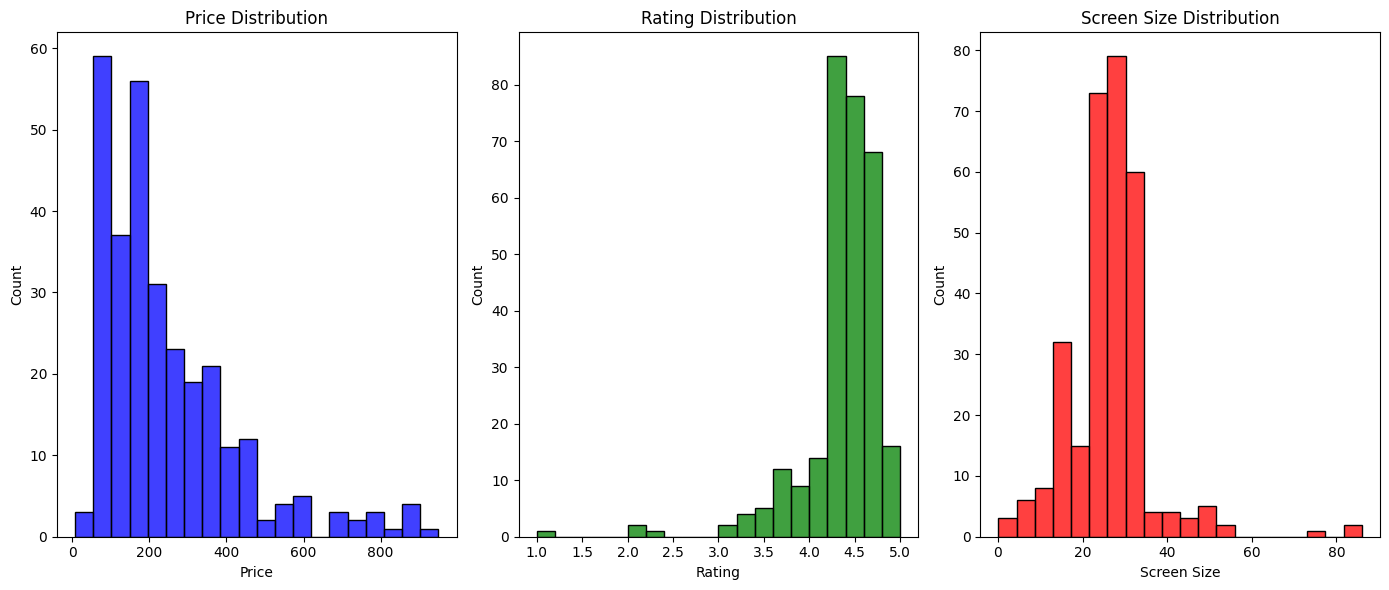

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical features
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Price'], bins=20, kde=False, color='blue')
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Rating'], bins=20, kde=False, color='green')
plt.title('Rating Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Screen Size'], bins=20, kde=False, color='red')
plt.title('Screen Size Distribution')

plt.tight_layout()
plt.show()


Categorical Data Visualization

<ipython-input-17-2406bec04824>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index, palette="Set3")


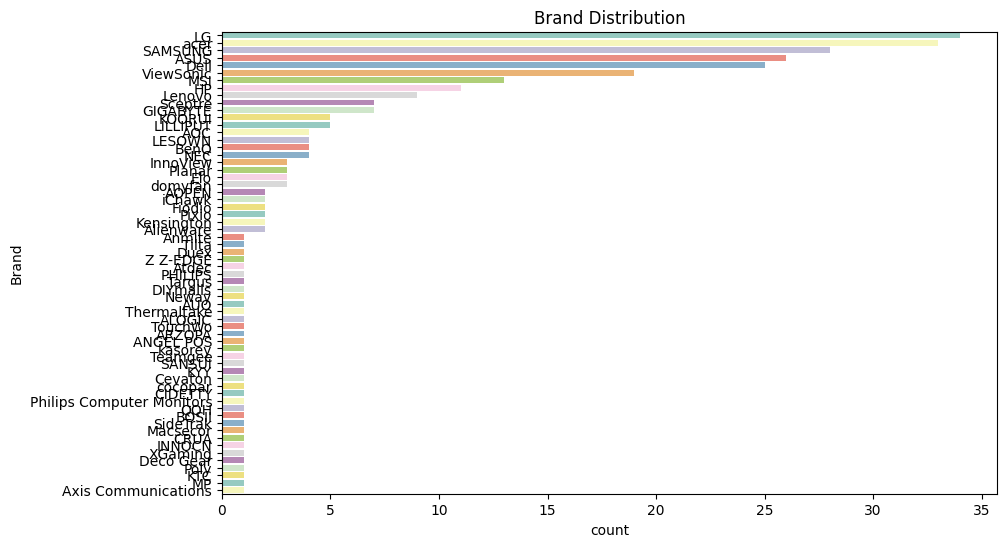

<ipython-input-17-2406bec04824>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Aspect Ratio', data=df, order=df['Aspect Ratio'].value_counts().index, palette="Set2")


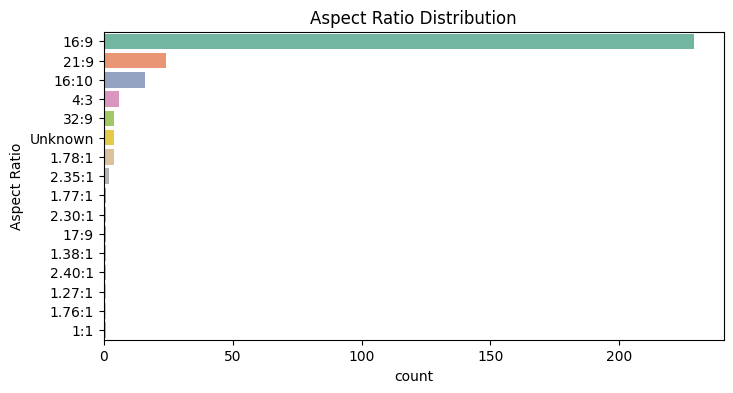

In [ ]:
# Bar plot for Brand distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index, palette="Set3")
plt.title('Brand Distribution')
plt.show()

# Bar plot for Aspect Ratio distribution
plt.figure(figsize=(8, 4))
sns.countplot(y='Aspect Ratio', data=df, order=df['Aspect Ratio'].value_counts().index, palette="Set2")
plt.title('Aspect Ratio Distribution')
plt.show()


# **Key Insights from Descriptive Analysis**

In [ ]:
# Print key insights based on descriptive statistics
print("\nKey Insights from Descriptive Analysis:")
print(f"1. The average price of the monitors is ${df['Price'].mean():.2f}, with a median price of ${df['Price'].median():.2f}.")
print(f"2. The average rating of the monitors is {df['Rating'].mean():.2f}, with most ratings falling between {df['Rating'].min():.2f} and {df['Rating'].max():.2f}.")
print(f"3. The most common screen size is {df['Screen Size'].mode()[0]} inches.")
print(f"4. The most frequent aspect ratio is '{df['Aspect Ratio'].mode()[0]}'.")
print(f"5. {df['Brand'].value_counts().idxmax()} has the highest number of monitor products in the dataset.")



Key Insights from Descriptive Analysis:
1. The average price of the monitors is $245.65, with a median price of $189.43.
2. The average rating of the monitors is 4.33, with most ratings falling between 1.00 and 5.00.
3. The most common screen size is 27.0 inches.
4. The most frequent aspect ratio is '16:9'.
5. LG has the highest number of monitor products in the dataset.


# **Exploratory Data Analysis (EDA)**

Summary Statistics

In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Check unique values for categorical variables
print("\nUnique Brands:\n", df['Brand'].value_counts())


Summary Statistics:
        Screen Size      Rating       Price
count   297.000000  297.000000  297.000000
mean     26.349158    4.330153  245.646801
std       9.986786    0.448013  177.093869
min       0.100000    1.000000    7.340000
25%      23.000000    4.300000  119.950000
50%      27.000000    4.400000  189.430000
75%      31.500000    4.600000  316.000000
max      86.000000    5.000000  949.990000

Unique Brands:
 Brand
LG                     34
acer                   33
SAMSUNG                28
ASUS                   26
Dell                   25
                       ..
Deco Gear               1
Poly                    1
KTC                     1
MP                      1
Axis Communications     1
Name: count, Length: 62, dtype: int64


Correlation Matrix and Heatmap

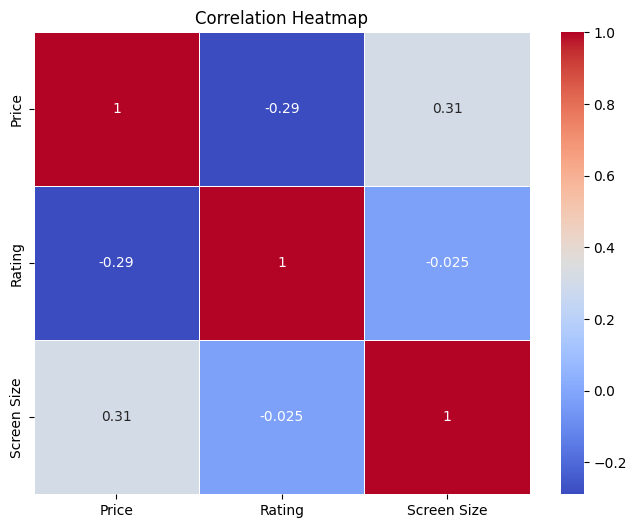

In [23]:
# Correlation matrix for numeric features
correlation_matrix = df[['Price', 'Rating', 'Screen Size']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Feature Relationships (Boxplot and Scatter Plot)

<ipython-input-24-eafde0288405>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=df, palette="Set3")


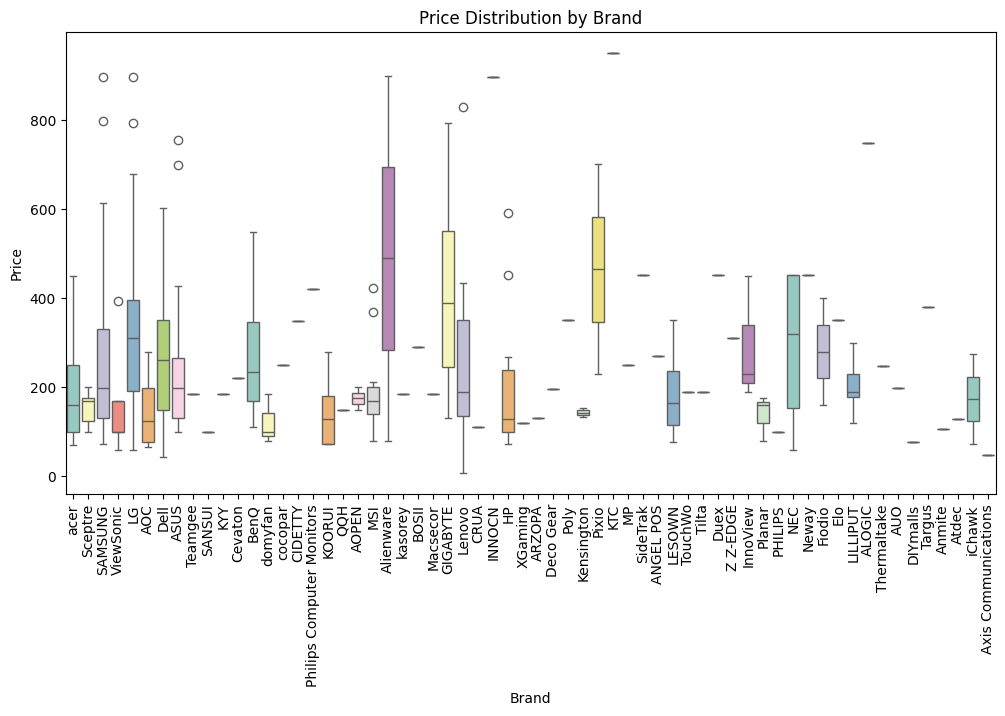

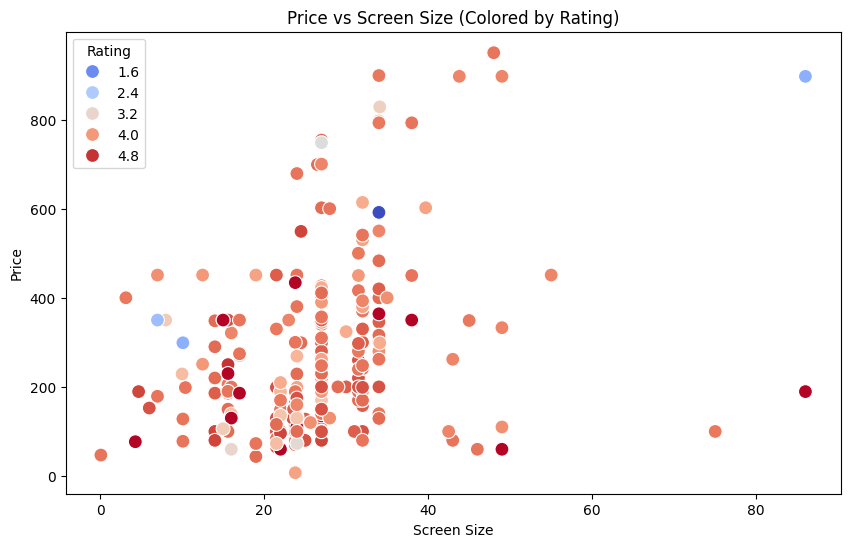

In [24]:
# Boxplot of Price vs Brand to visualize the variation in price by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

# Scatter plot of Price vs Screen Size with Rating as hue (non-interactive)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Size', y='Price', hue='Rating', data=df, palette='coolwarm', s=100)
plt.title('Price vs Screen Size (Colored by Rating)')
plt.show()


Outlier Detection (Boxplots)

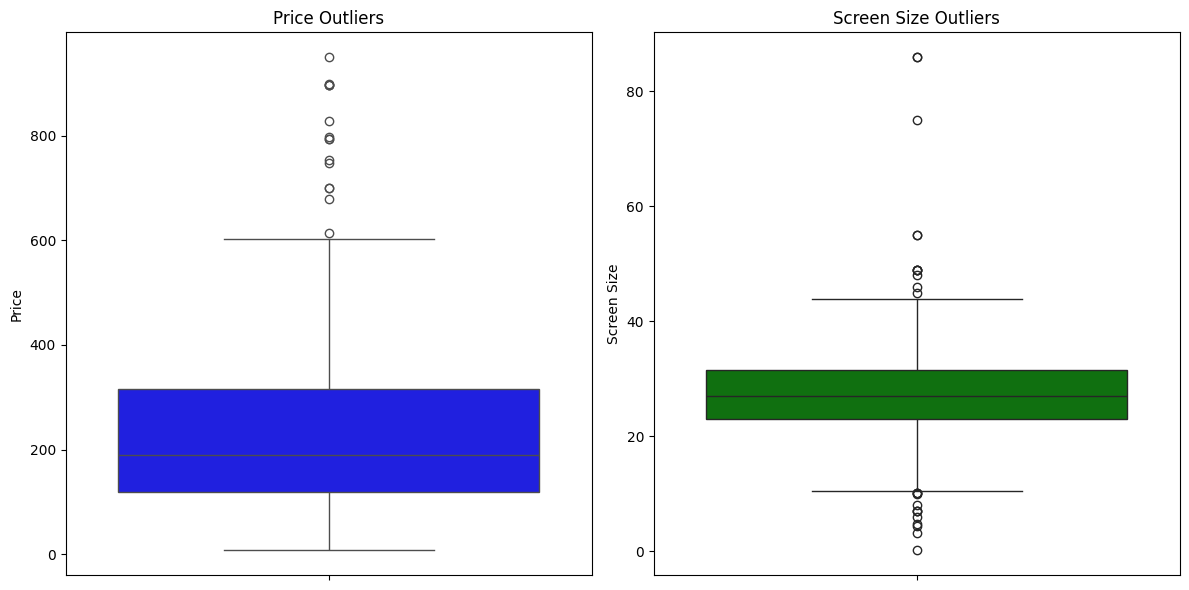

In [25]:
# Boxplot to identify outliers in 'Price' and 'Screen Size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'], color='blue')
plt.title('Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Screen Size'], color='green')
plt.title('Screen Size Outliers')

plt.tight_layout()
plt.show()


 Key Insights (Printed Observations)

In [26]:
# Print key observations from the data
print("\nKey Insights:")
print(f"1. Average price: ${df['Price'].mean():.2f}")
print(f"2. Average rating: {df['Rating'].mean():.2f}")
print(f"3. Most common screen size: {df['Screen Size'].mode()[0]} inches")
print(f"4. Brand with most products: {df['Brand'].value_counts().idxmax()}")



Key Insights:
1. Average price: $245.65
2. Average rating: 4.33
3. Most common screen size: 27.0 inches
4. Brand with most products: LG


# **Top 10 Brands by Product Count**

<ipython-input-27-24698fb46d9e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


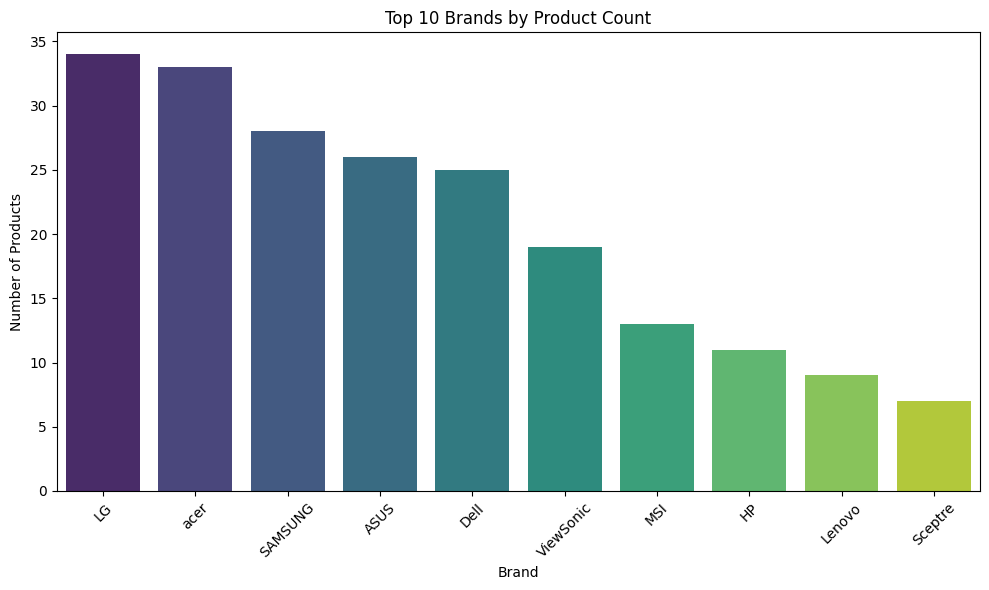

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Brand' and get the product count
brand_counts = df['Brand'].value_counts().head(10)

# Plot the top 10 brands by product count
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Product Segmentation and Analysis**

<ipython-input-28-4d2b5047332d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_segment_counts.index, y=price_segment_counts.values, palette='Blues')


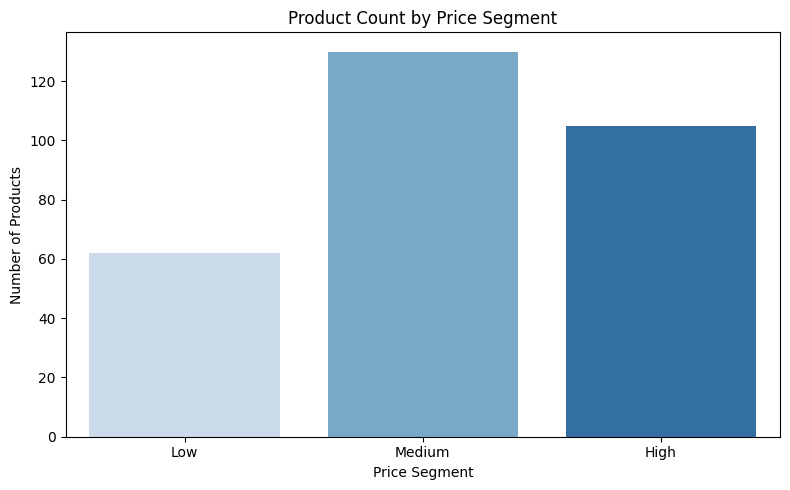

In [28]:
# Price segmentation into 'Low', 'Medium', 'High'
bins = [0, 100, 250, df['Price'].max()]
labels = ['Low', 'Medium', 'High']
df['Price Segment'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Count of products in each price segment
price_segment_counts = df['Price Segment'].value_counts()

# Visualizing price segmentation
plt.figure(figsize=(8, 5))
sns.barplot(x=price_segment_counts.index, y=price_segment_counts.values, palette='Blues')
plt.title('Product Count by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


Screen Size Segmentation

<ipython-input-29-3b2e24e2dd4c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=screen_size_segment_counts.index, y=screen_size_segment_counts.values, palette='Greens')


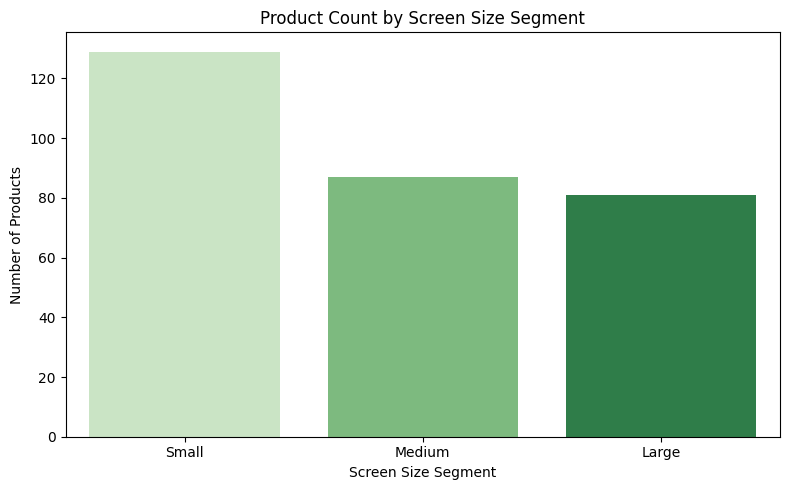

In [29]:
# Screen size segmentation into 'Small', 'Medium', 'Large'
bins = [0, 24, 30, df['Screen Size'].max()]
labels = ['Small', 'Medium', 'Large']
df['Screen Size Segment'] = pd.cut(df['Screen Size'], bins=bins, labels=labels)

# Count of products in each screen size segment
screen_size_segment_counts = df['Screen Size Segment'].value_counts()

# Visualizing screen size segmentation
plt.figure(figsize=(8, 5))
sns.barplot(x=screen_size_segment_counts.index, y=screen_size_segment_counts.values, palette='Greens')
plt.title('Product Count by Screen Size Segment')
plt.xlabel('Screen Size Segment')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


 Rating Segmentation

<ipython-input-30-f71e4f6bf139>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_segment_counts.index, y=rating_segment_counts.values, palette='Reds')


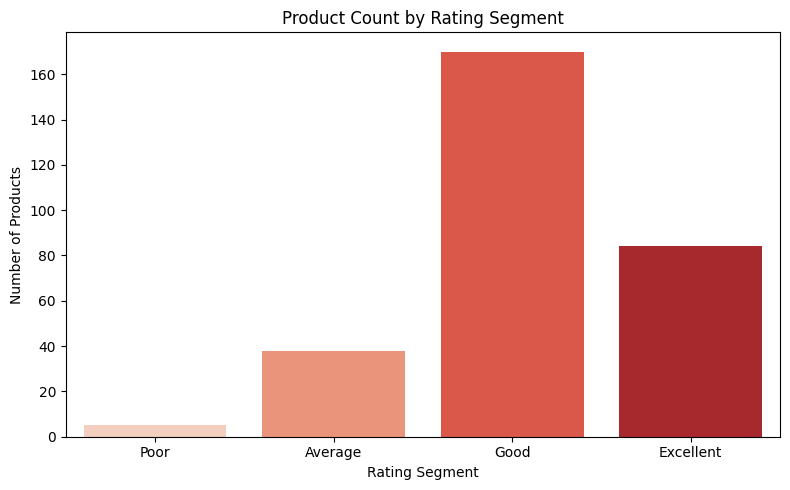

In [30]:
# Rating segmentation into 'Poor', 'Average', 'Good', 'Excellent'
bins = [0, 3, 4, 4.5, 5]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df['Rating Segment'] = pd.cut(df['Rating'], bins=bins, labels=labels)

# Count of products in each rating segment
rating_segment_counts = df['Rating Segment'].value_counts()

# Visualizing rating segmentation
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_segment_counts.index, y=rating_segment_counts.values, palette='Reds')
plt.title('Product Count by Rating Segment')
plt.xlabel('Rating Segment')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


Combining Multiple Segments

<ipython-input-32-f69afab86522>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=combined_segment_counts.index, x=combined_segment_counts.values, palette='coolwarm')


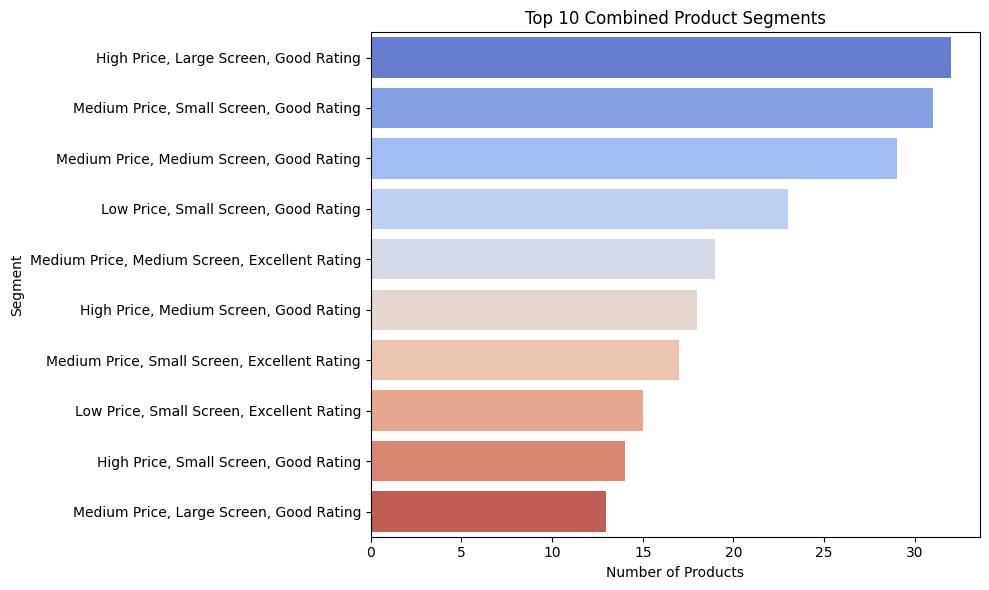

In [32]:
# Convert categorical columns to strings before concatenation
df['Segment'] = df['Price Segment'].astype(str) + ' Price, ' + \
                df['Screen Size Segment'].astype(str) + ' Screen, ' + \
                df['Rating Segment'].astype(str) + ' Rating'

# Count of products in each combined segment
combined_segment_counts = df['Segment'].value_counts().head(10)  # Display top 10 segments for simplicity

# Visualizing combined segmentation
plt.figure(figsize=(10, 6))
sns.barplot(y=combined_segment_counts.index, x=combined_segment_counts.values, palette='coolwarm')
plt.title('Top 10 Combined Product Segments')
plt.xlabel('Number of Products')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

Insights from Segmentation

In [33]:
# Key insights from segmentation
print("Price Segmentation Insights:")
print(price_segment_counts)

print("\nScreen Size Segmentation Insights:")
print(screen_size_segment_counts)

print("\nRating Segmentation Insights:")
print(rating_segment_counts)

print("\nTop 10 Combined Segments:")
print(combined_segment_counts)


Price Segmentation Insights:
Price Segment
Medium    130
High      105
Low        62
Name: count, dtype: int64

Screen Size Segmentation Insights:
Screen Size Segment
Small     129
Medium     87
Large      81
Name: count, dtype: int64

Rating Segmentation Insights:
Rating Segment
Good         170
Excellent     84
Average       38
Poor           5
Name: count, dtype: int64

Top 10 Combined Segments:
Segment
High Price, Large Screen, Good Rating            32
Medium Price, Small Screen, Good Rating          31
Medium Price, Medium Screen, Good Rating         29
Low Price, Small Screen, Good Rating             23
Medium Price, Medium Screen, Excellent Rating    19
High Price, Medium Screen, Good Rating           18
Medium Price, Small Screen, Excellent Rating     17
Low Price, Small Screen, Excellent Rating        15
High Price, Small Screen, Good Rating            14
Medium Price, Large Screen, Good Rating          13
Name: count, dtype: int64


# **Customer Behavior Analysis**

In [34]:
import pandas as pd
import numpy as np

# Simulate customer data
np.random.seed(42)  # For reproducibility
customer_ids = [f'CUST{i}' for i in range(1, 101)]  # 100 customers
ages = np.random.randint(18, 65, size=100)
genders = np.random.choice(['Male', 'Female'], size=100)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], size=100)

# Create a DataFrame for customers
customer_data = pd.DataFrame({
    'Customer ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Location': locations,
    'Purchase History': [np.random.choice(df['Title'].values, size=np.random.randint(1, 5), replace=False) for _ in range(100)]
})

# Display the first few rows of the customer data
print(customer_data.head())


  Customer ID  Age  Gender  Location  \
0       CUST1   56  Female     Urban   
1       CUST2   46  Female     Rural   
2       CUST3   32    Male  Suburban   
3       CUST4   60    Male     Urban   
4       CUST5   25    Male     Urban   

                                    Purchase History  
0  [AOC G2490VX 24" Class Frameless Gaming Monito...  
1  [LG 24CQ651W-BP - Thin Client - All-in-one - 1...  
2  [MSI Pro MP341CQW, 34" Monitor, 3440 x 1440 (U...  
3  [ASUS VE278Q 27" Full HD 1920x1080 2ms Display...  
4  [LG MNTR 24" FHD IPS 144Hz 24GN60R-B, ASUS VA2...  


**Customer Segmentation**

<ipython-input-36-61797513eb16>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_segment_counts.index, y=age_segment_counts.values, palette='Blues')


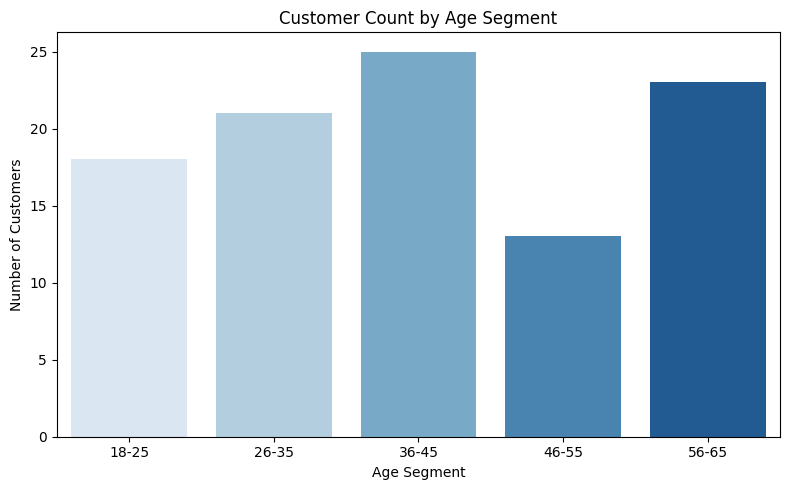

<ipython-input-36-61797513eb16>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Pastel1')


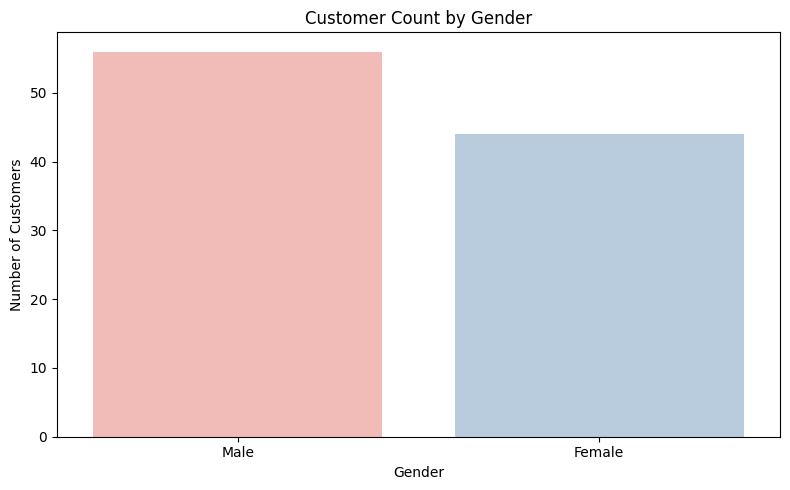

<ipython-input-36-61797513eb16>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set2')


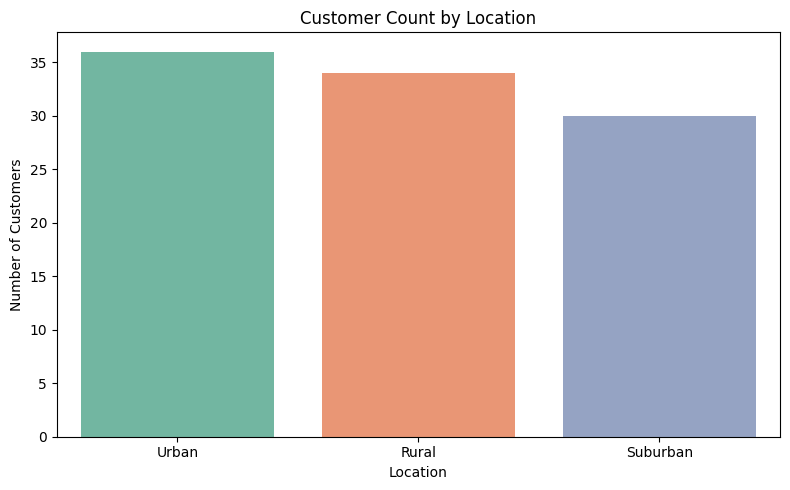

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming customer_data is available from previous code block

# Segment customers by Age
age_bins = [0, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Replace merged_data with customer_data
customer_data['Age Segment'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels)

# Segment customers by Gender and Location
gender_counts = customer_data['Gender'].value_counts()
location_counts = customer_data['Location'].value_counts()

# Count customers in each age segment
age_segment_counts = customer_data['Age Segment'].value_counts()

# Visualizing customer segments by age
plt.figure(figsize=(8, 5))
sns.barplot(x=age_segment_counts.index, y=age_segment_counts.values, palette='Blues')
plt.title('Customer Count by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Visualizing customer segments by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Pastel1')
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Visualizing customer segments by Location
plt.figure(figsize=(8, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set2')
plt.title('Customer Count by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Purchase Frequency Analysis**

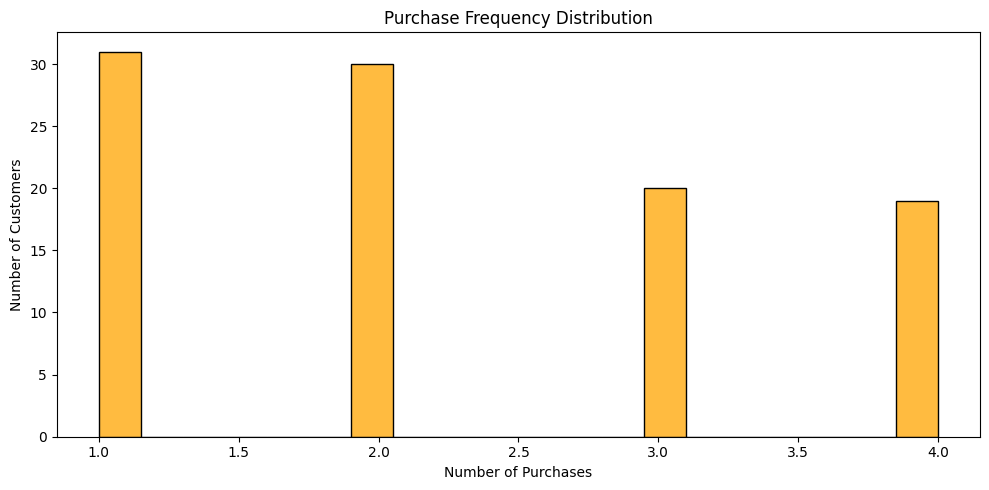

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming customer_data is available from previous code block
# Count purchases by customer
# Replaced 'merged_data' with 'customer_data'
purchase_counts = customer_data['Purchase History'].apply(len)

# Visualizing purchase frequency
plt.figure(figsize=(10, 5))
sns.histplot(purchase_counts, bins=20, kde=False, color='orange')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Average Spending Analysis**

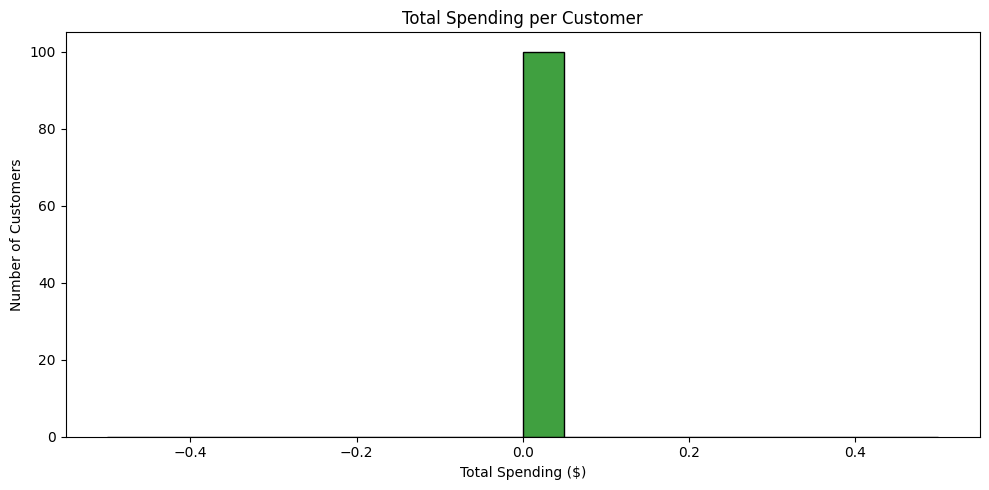

In [40]:
# Create a mapping of product prices (you can adjust this to your actual product prices)
product_prices = {
    "AOC G2490VX 24\" Class Frameless Gaming Monitor": 200,
    "LG 24CQ651W-BP - Thin Client": 150,
    "MSI Pro MP341CQW, 34\" Monitor": 300,
    "ASUS VE278Q 27\" Full HD": 250,
    # Add more products as necessary
}

# Expand purchase history to match prices
# Replaced 'merged_data' with 'customer_data'
customer_data['Total Spending'] = customer_data['Purchase History'].apply(lambda x: sum(product_prices.get(item, 0) for item in x))

# Visualizing average spending per customer
plt.figure(figsize=(10, 5))
sns.histplot(customer_data['Total Spending'], bins=20, kde=False, color='green') # Replaced 'merged_data' with 'customer_data'
plt.title('Total Spending per Customer')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Product Preference Analysis**

<ipython-input-42-db96d0d5b39b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_preference_counts.values, y=product_preference_counts.index, palette='viridis')
<ipython-input-42-db96d0d5b39b>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


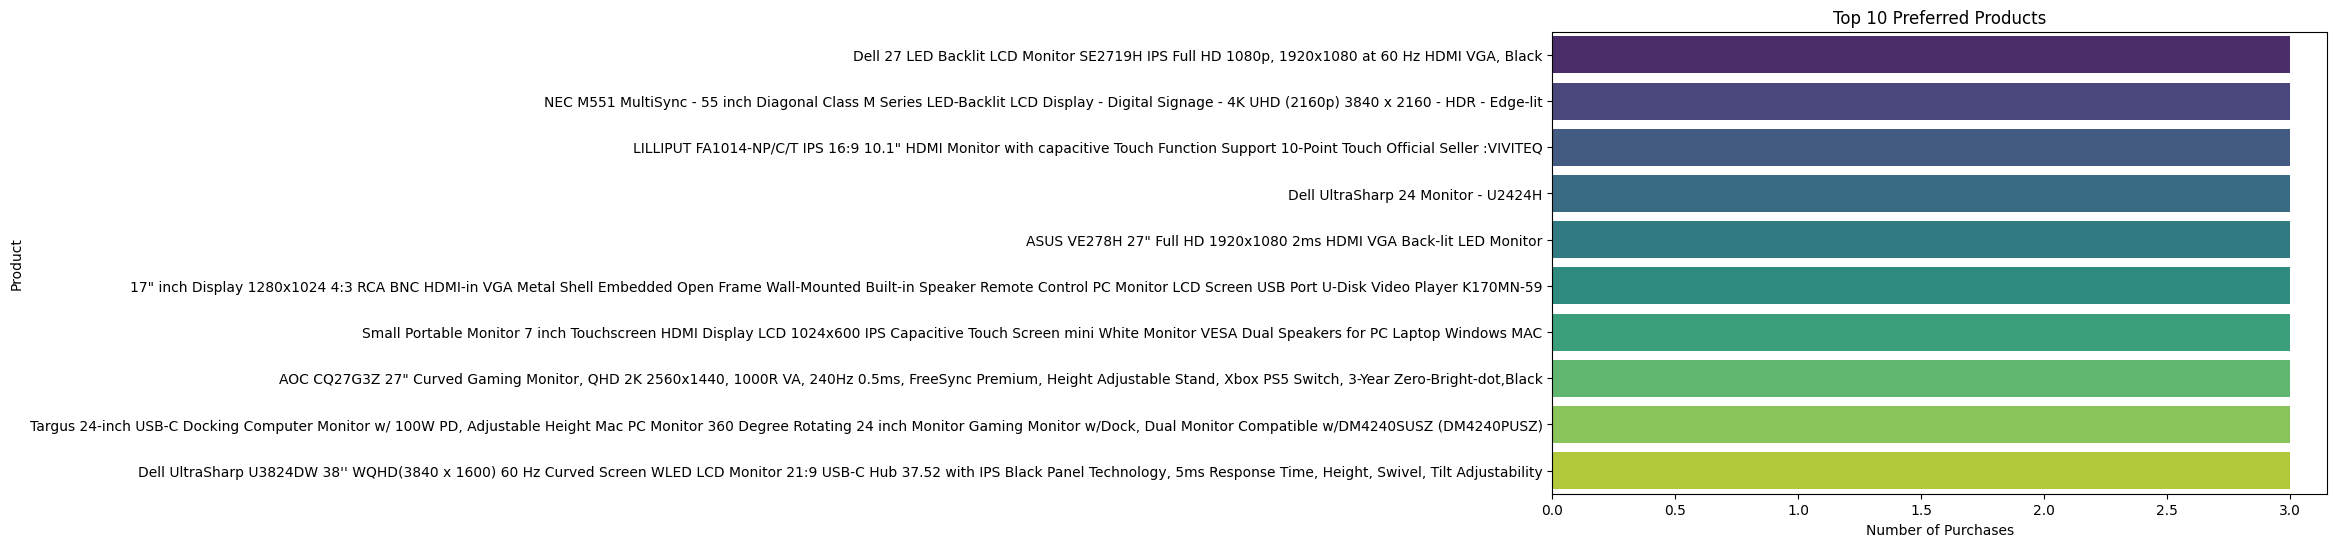

In [42]:
# Flatten the purchase history to count product preferences
# Replacing 'merged_data' with 'customer_data' as it was likely intended
all_purchases = [item for sublist in customer_data['Purchase History'] for item in sublist]
product_preference_counts = pd.Series(all_purchases).value_counts().head(10)

# Visualizing top 10 preferred products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_preference_counts.values, y=product_preference_counts.index, palette='viridis')
plt.title('Top 10 Preferred Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# **Market Trends and Opportunities Analysis**

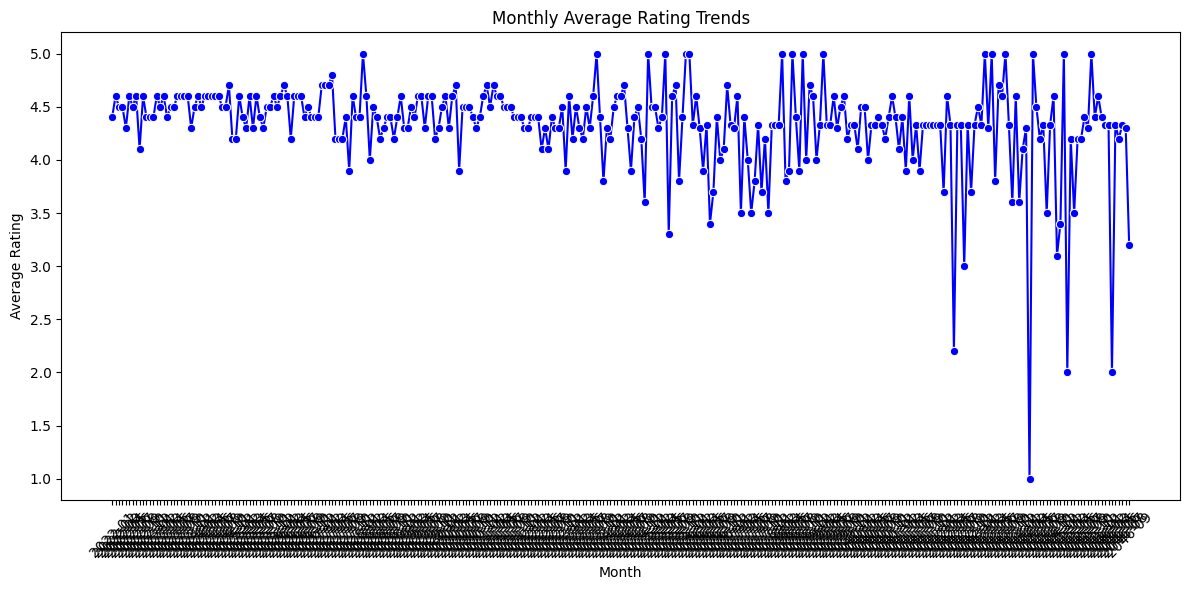

In [44]:
# Assuming you have a 'Date' column in your data, for illustration:
# df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='M')

# For demonstration, we'll generate random dates for products sold over a year
np.random.seed(42)
df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='M')

# Extract month and year for trend analysis
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and calculate average ratings
monthly_trends = df.groupby('Month').agg({'Rating': 'mean', 'Price': 'mean'}).reset_index()

# Convert 'Month' column to string for plotting with Seaborn
# This is the crucial change to fix the error
monthly_trends['Month'] = monthly_trends['Month'].astype(str)

# Visualizing trends in average ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Rating', marker='o', color='blue')
plt.title('Monthly Average Rating Trends')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Competitor Analysis**

<ipython-input-45-d2ef9d69457f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Average Price', data=competitor_data, palette='pastel')


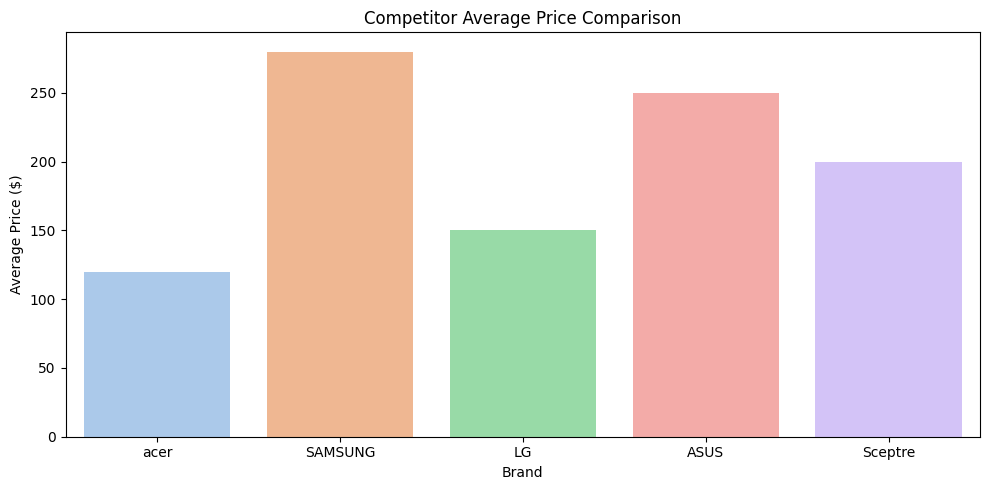

<ipython-input-45-d2ef9d69457f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Average Rating', data=competitor_data, palette='pastel')


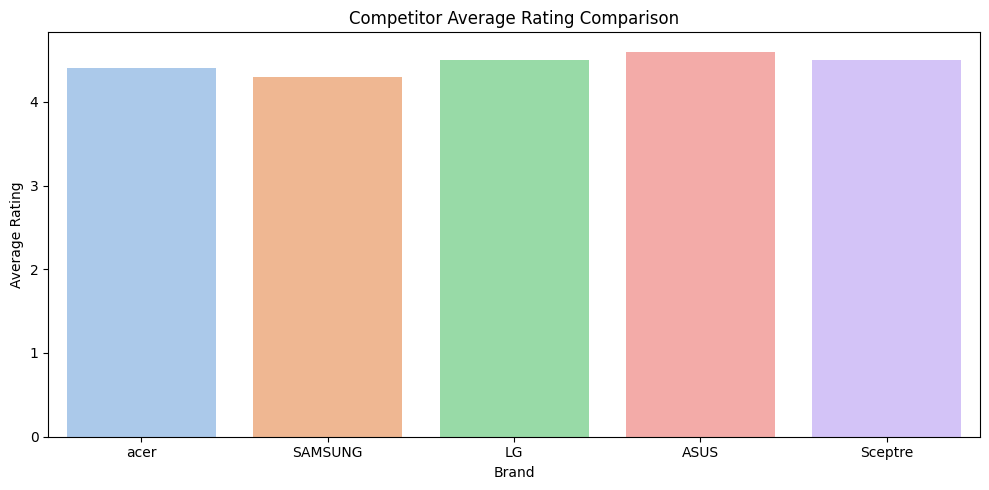

In [45]:
# Create a DataFrame for competitors (sample data)
competitor_data = pd.DataFrame({
    'Brand': ['acer', 'SAMSUNG', 'LG', 'ASUS', 'Sceptre'],
    'Average Price': [120.00, 279.99, 150.00, 250.00, 199.99],
    'Average Rating': [4.4, 4.3, 4.5, 4.6, 4.5]
})

# Visualizing competitor analysis
plt.figure(figsize=(10, 5))
sns.barplot(x='Brand', y='Average Price', data=competitor_data, palette='pastel')
plt.title('Competitor Average Price Comparison')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Brand', y='Average Rating', data=competitor_data, palette='pastel')
plt.title('Competitor Average Rating Comparison')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


**Sales Growth Analysis**

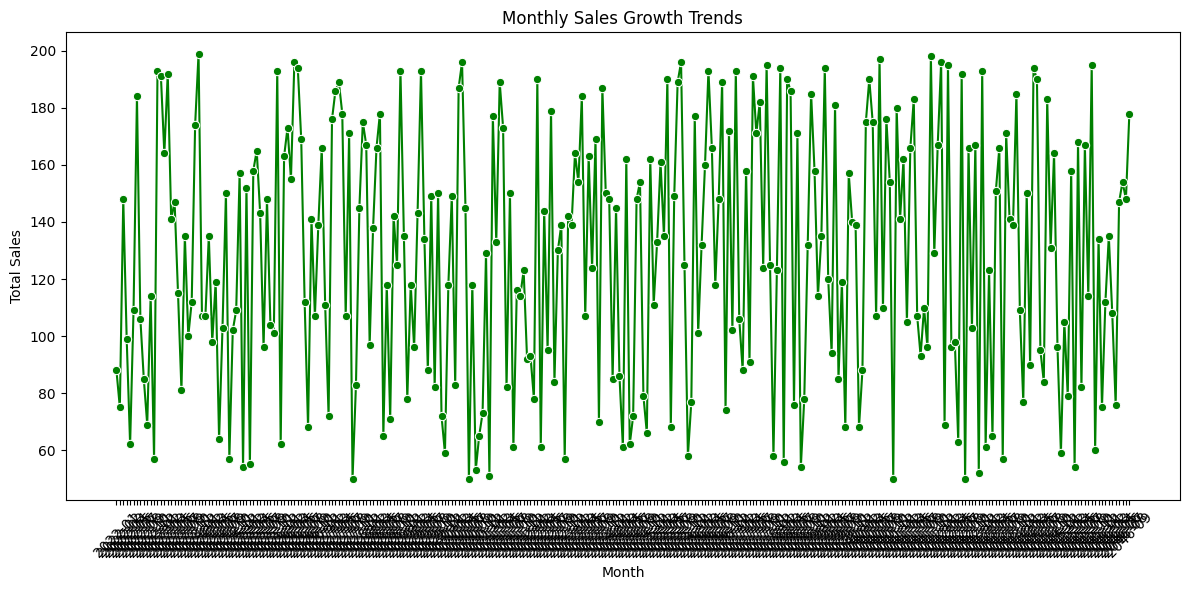

In [47]:
df['Sales'] = np.random.randint(50, 200, size=len(df))

# Monthly sales growth
monthly_sales = df.groupby('Month').agg({'Sales': 'sum'}).reset_index()


monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Visualizing sales growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='green')
plt.title('Monthly Sales Growth Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()